# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data

In [2]:
data=pd.read_csv("dataset/HousePrice_Tehran.csv")

In [3]:
data

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


# information about dataset  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


# Area is numerical feature and in this data set save as a object therefor we convert it to numerical 

In [5]:
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

# Considering that the variables of parking room, warehouse and elevator are classified variables, we convert them into numerical variables using the Get Damis method.

In [6]:
data = pd.get_dummies(data, columns=['Room'])
data = pd.get_dummies(data, columns=['Parking'])
data = pd.get_dummies(data, columns=['Warehouse'])
data = pd.get_dummies(data, columns=['Elevator'])


In [7]:
data

,Area,Address,Price,Price(USD),Room_0,Room_1,Room_2,Room_3,Room_4,Room_5,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,Shahran,1.850000e+09,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
1,60.0,Shahran,1.850000e+09,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
2,79.0,Pardis,5.500000e+08,18333.33,0,0,1,0,0,0,0,1,0,1,0,1
3,95.0,Shahrake Qods,9.025000e+08,30083.33,0,0,1,0,0,0,0,1,0,1,0,1
4,123.0,Shahrake Gharb,7.000000e+09,233333.33,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86.0,Southern Janatabad,3.500000e+09,116666.67,0,0,1,0,0,0,0,1,0,1,0,1
3475,83.0,Niavaran,6.800000e+09,226666.67,0,0,1,0,0,0,0,1,0,1,0,1
3476,75.0,Parand,3.650000e+08,12166.67,0,0,1,0,0,0,1,0,1,0,1,0
3477,105.0,Dorous,5.600000e+09,186666.67,0,0,1,0,0,0,0,1,0,1,0,1


# Considering that the response variable in this analysis is the housing price and we have two price columns, we will remove the price column in Rials from the data.

In [8]:
data = data.drop(["Price"], axis=1)

# Please note that in predicting the price of a city, addresses that do not repeat a lot do not have a significant impact, therefore, in this analysis, we delete addresses that are repeated 5 or less than 5 times from the data.

In [9]:
min_repeat =5
vc = data['Address'].value_counts()
data = data[data['Address'].isin(vc[vc > min_repeat].index)]
data.Address.value_counts()

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
                         ... 
Tarasht                     6
Afsarieh                    6
Sadeghieh                   6
Absard                      6
Hor Square                  6
Name: Address, Length: 90, dtype: int64

In [10]:
data

,Area,Address,Price(USD),Room_0,Room_1,Room_2,Room_3,Room_4,Room_5,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
1,60.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
2,79.0,Pardis,18333.33,0,0,1,0,0,0,0,1,0,1,0,1
3,95.0,Shahrake Qods,30083.33,0,0,1,0,0,0,0,1,0,1,0,1
4,123.0,Shahrake Gharb,233333.33,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86.0,Southern Janatabad,116666.67,0,0,1,0,0,0,0,1,0,1,0,1
3475,83.0,Niavaran,226666.67,0,0,1,0,0,0,0,1,0,1,0,1
3476,75.0,Parand,12166.67,0,0,1,0,0,0,1,0,1,0,1,0
3477,105.0,Dorous,186666.67,0,0,1,0,0,0,0,1,0,1,0,1


# According to the implicit review of the data, we realized that a number of addresses have unconventional areas and their prices will not be based on the trend of house prices in a province, so we removed addresses with an area of more than a thousand meters from the data.

In [11]:
data = data[data['Area']<1000]


In [12]:
data

,Area,Address,Price(USD),Room_0,Room_1,Room_2,Room_3,Room_4,Room_5,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
1,60.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
2,79.0,Pardis,18333.33,0,0,1,0,0,0,0,1,0,1,0,1
3,95.0,Shahrake Qods,30083.33,0,0,1,0,0,0,0,1,0,1,0,1
4,123.0,Shahrake Gharb,233333.33,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86.0,Southern Janatabad,116666.67,0,0,1,0,0,0,0,1,0,1,0,1
3475,83.0,Niavaran,226666.67,0,0,1,0,0,0,0,1,0,1,0,1
3476,75.0,Parand,12166.67,0,0,1,0,0,0,1,0,1,0,1,0
3477,105.0,Dorous,186666.67,0,0,1,0,0,0,0,1,0,1,0,1


# After the finalization of the data, it is time to determine the assignment of the course data. On the other hand, the only column in which there is a possibility of missing period data is the area column, so use boxplot to find the missing period data in this column. and after determining the limits of the expired data, we subtract them from the data

# Handle the outlier

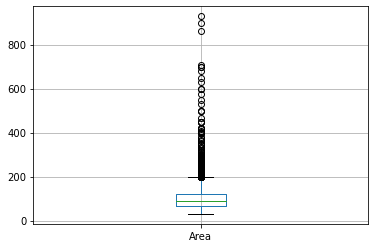

In [13]:
data.iloc[:,[0]].boxplot()
plt.show()

# Subtract outlier data from data
 

In [14]:
Q1 = data.iloc[:,0].quantile(0.25)
Q3 = data.iloc[:,0].quantile(0.75)

LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)
data = data[data["Area"] <= UB]

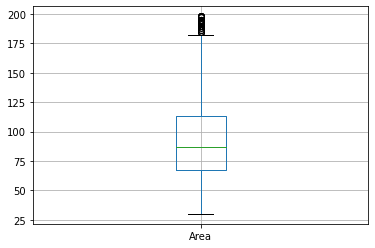

In [15]:
data.iloc[:,[0]].boxplot()
plt.show()

In [16]:
data

,Area,Address,Price(USD),Room_0,Room_1,Room_2,Room_3,Room_4,Room_5,Parking_False,Parking_True,Warehouse_False,Warehouse_True,Elevator_False,Elevator_True
0,63.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
1,60.0,Shahran,61666.67,0,1,0,0,0,0,0,1,0,1,0,1
2,79.0,Pardis,18333.33,0,0,1,0,0,0,0,1,0,1,0,1
3,95.0,Shahrake Qods,30083.33,0,0,1,0,0,0,0,1,0,1,0,1
4,123.0,Shahrake Gharb,233333.33,0,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86.0,Southern Janatabad,116666.67,0,0,1,0,0,0,0,1,0,1,0,1
3475,83.0,Niavaran,226666.67,0,0,1,0,0,0,0,1,0,1,0,1
3476,75.0,Parand,12166.67,0,0,1,0,0,0,1,0,1,0,1,0
3477,105.0,Dorous,186666.67,0,0,1,0,0,0,0,1,0,1,0,1


# Handle missing value

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3011 entries, 0 to 3478
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             3011 non-null   float64
 1   Address          3011 non-null   object 
 2   Price(USD)       3011 non-null   float64
 3   Room_0           3011 non-null   uint8  
 4   Room_1           3011 non-null   uint8  
 5   Room_2           3011 non-null   uint8  
 6   Room_3           3011 non-null   uint8  
 7   Room_4           3011 non-null   uint8  
 8   Room_5           3011 non-null   uint8  
 9   Parking_False    3011 non-null   uint8  
 10  Parking_True     3011 non-null   uint8  
 11  Warehouse_False  3011 non-null   uint8  
 12  Warehouse_True   3011 non-null   uint8  
 13  Elevator_False   3011 non-null   uint8  
 14  Elevator_True    3011 non-null   uint8  
dtypes: float64(2), object(1), uint8(12)
memory usage: 129.4+ KB


# Based on the table above, the data does not have any missing data

# handle categorical data

### for handle categorical data in this dataset we use Leave one out encoding

<Figure size 432x288 with 0 Axes>

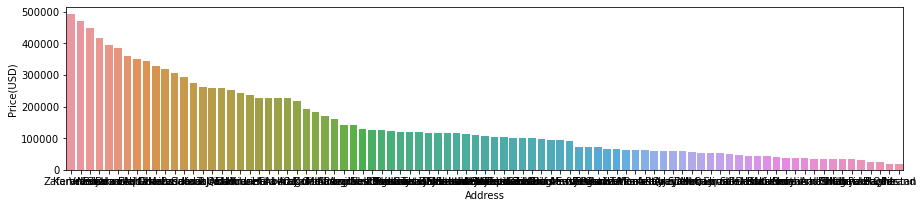

In [18]:
import seaborn as sns
plt.figure()
fig , ax=plt.subplots(figsize=(15,3))
Add_perc=data[['Address','Price(USD)']].groupby(['Address'],as_index=False).mean()
Add_perc.sort_values(by='Price(USD)',ascending=False,inplace=True)
sns.barplot(ax=ax,x='Address',y='Price(USD)',data=Add_perc,order=Add_perc['Address']);

### As you can see in the figure above, sorting the addresses based on the price gives us a good view of the classification of the addresses and it is possible to convert the address to a numerical variable using the encoding method based on the response variable, but the encoding is based on the response variable There are two problems: 
### 1. information leakage 
### 2. overfitting, 
### so we use a new method called **Leave one out** encodding


# Note that in using the encoding methods based on the response variable, we must first convert the data into two parts of training and test data and then perform the encoding.

In [19]:
X = data.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14]]
Y = data.iloc[:,2]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size= 0.7, random_state = 42)

# Leave one out encodding

In [21]:
import category_encoders as ce

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
encoder = ce.LeaveOneOutEncoder(cols='Address',sigma=0.1)
X_train_loo = encoder.fit_transform(X_train, Y_train)
X_train_loo

In [ ]:
encoder = ce.LeaveOneOutEncoder(cols='Address',sigma=0.1)
X_test_loo = encoder.fit_transform(X_test,Y_test)
X_test_loo


# model selection

### Brut-Force Method

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True)

# Feature scalling

In [ ]:
#Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_loo = scaler.fit_transform(X_train_loo)
X_test_loo = scaler.transform(X_test_loo)

# Filter method 

---------
** The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data.
Selecting best features is important process when we prepare a large dataset for training. 
It helps us to eliminate less important part of the data and reduce a training time.**

   

***For regression, we'll set 'f_regression'  method as a scoring function.
The target number of features to select is 7***

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#Apply SelectKBest class to select top n features
selected = SelectKBest(f_regression, k = 7).fit(X_train_loo,Y_train)
dfscores = pd.DataFrame(selected.scores_)
dfcolumns = pd.DataFrame(X.columns)

#Conatenating two mentioned dataframes for better displaying
featurescores = pd.concat([dfcolumns, dfscores],axis = 1)
featurescores.columns = ["feature_name", "feature_score"]
featurescores.nlargest(7, "feature_score")

In [ ]:
X_train_loo=pd.DataFrame(X_train_loo)
X_test_loo=pd.DataFrame(X_test_loo)
X_train_loo=X_train_loo.iloc[:,[1,0,5,3,9,8,12]]
X_test_loo=X_test_loo.iloc[:,[1,0,5,3,9,8,12]]

# Fit the regression model with features that selected with Filter method

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(X_train_loo,Y_train)

y_pred=reg.predict(X_test_loo)

plt.scatter(Y_test,y_pred)
plt.xlabel='price'
plt.ylabel='pred price'
plt.show()

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(Y_test,y_pred)

print(mse)

In [ ]:
mse=mean_squared_error(Y_test,y_pred)

In [ ]:
print(mse)

# Evaluate model 

In [ ]:
train_score_lr = reg.score(X_train_loo, Y_train)
test_score_lr = reg.score(X_test_loo, Y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

# Using ridge regression to prevent over-fitting

In [ ]:
#Ridge Regression Model
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train_loo,Y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_loo, Y_train)
test_score_ridge = ridgeReg.score(X_test_loo, Y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

# Using Lasso regression to prevent over-fitting

In [ ]:
#Lasso regression model
from sklearn.linear_model import Lasso
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train_loo,Y_train)
train_score_ls =lasso.score(X_train_loo,Y_train)
test_score_ls =lasso.score(X_test_loo,Y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

# Using cross-waliedition to find the best regression parameter of the Lasso and model score 

In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train_loo, Y_train)


#score
print(lasso_cv.score(X_train_loo, Y_train))
print(lasso_cv.score(X_test_loo, Y_test))

# Using cross-waliedition to find the best regression parameter of the Lasso and model score

In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_loo, Y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train_loo, Y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test_loo, Y_test)))